<a href="https://colab.research.google.com/github/Tim3s/Machine-Learning-Study/blob/main/8-3%20Visualization%20of%20Convolutional%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
model = keras.models.load_model('drive/MyDrive/2021-2_machine_learning_study/best-cnn-model.h5')

In [3]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.062355544 0.3327374


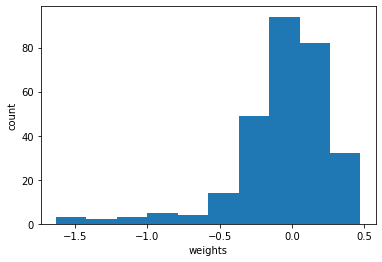

In [6]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

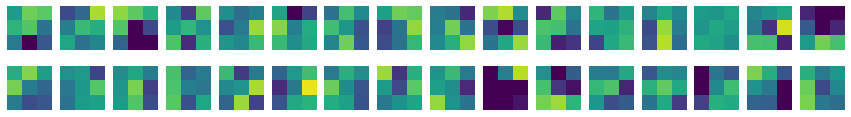

In [8]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [9]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [10]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.007444125 0.08347724


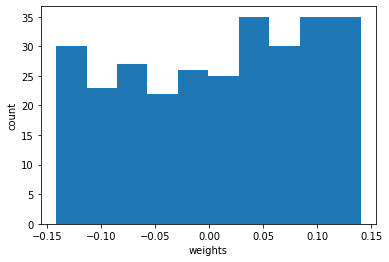

In [13]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

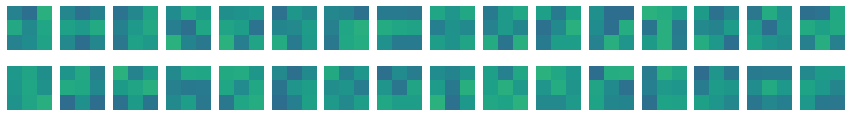

In [14]:
fig, axis = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axis[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axis[i, j].axis('off')
plt.show()

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [18]:
conv_acti = keras.Model(model.input, model.layers[0].output)

4431872/4422102 [==============================] - 0s 0us/step


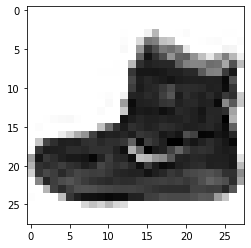

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')

In [23]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [25]:
print(feature_maps.shape)

(1, 28, 28, 32)


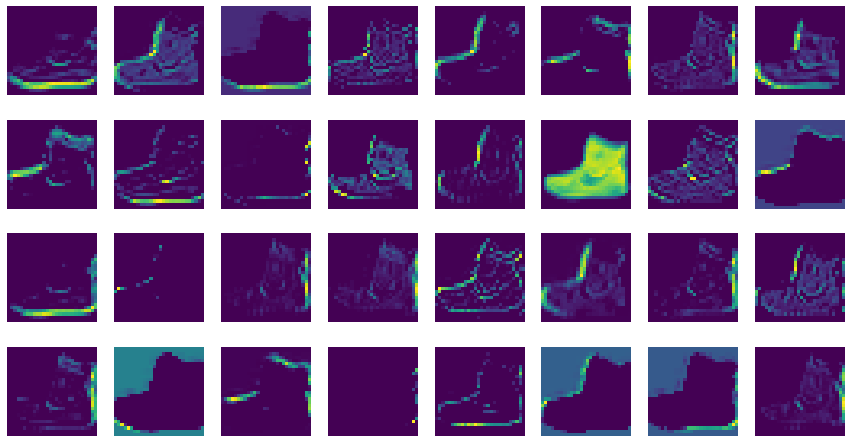

In [28]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [29]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [30]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [31]:
print(feature_maps.shape)

(1, 14, 14, 64)


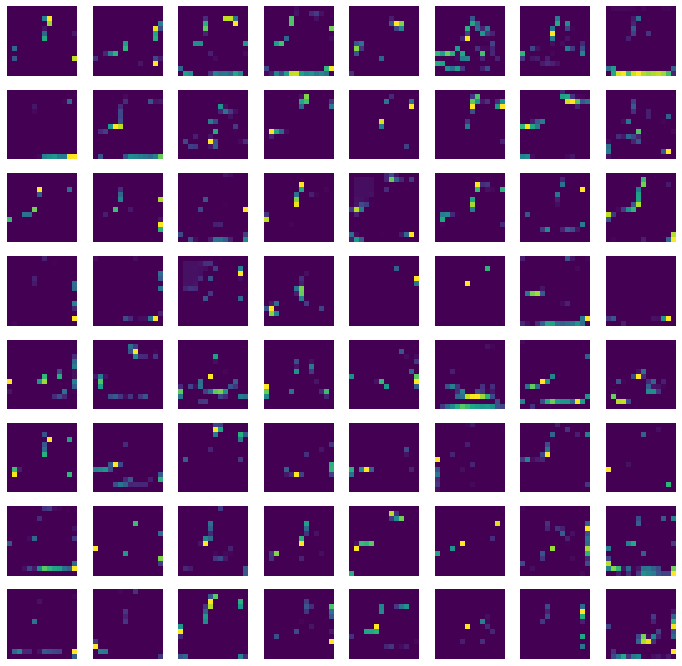

In [32]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [36]:
inputs = keras.Input((28, 28, 1))
conv1 = keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
maxpooling = keras.layers.MaxPooling2D(2)
conv2 = keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')
flatten = keras.layers.Flatten()
dense1 = keras.layers.Dense(100, activation='relu')
dropout = keras.layers.Dropout(0.4)
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Model(inputs, dense2(dropout(dense1(flatten(maxpooling(conv2(maxpooling(conv1(inputs)))))))))

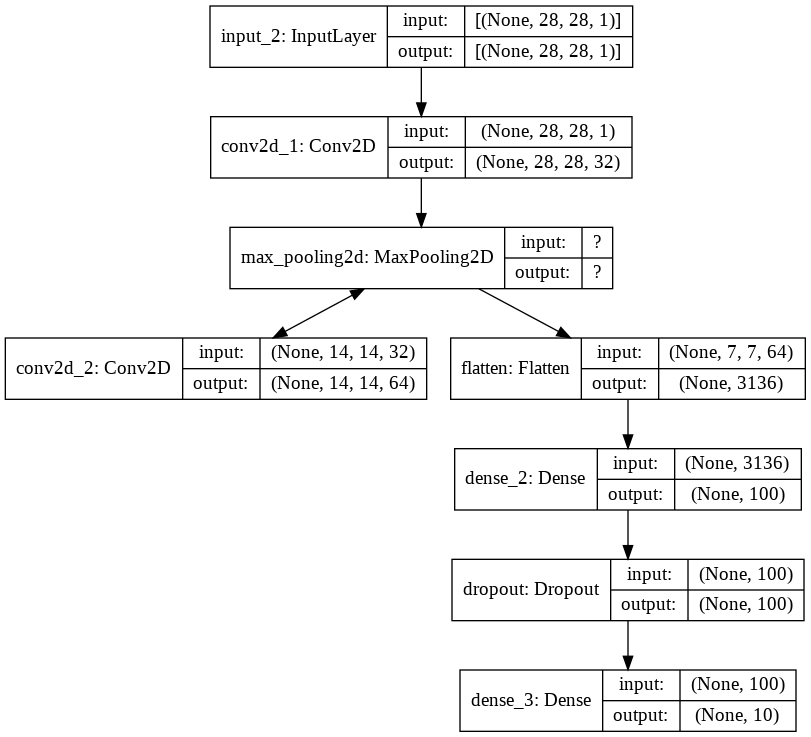

In [37]:
keras.utils.plot_model(model, show_shapes=True)

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    multiple             0           conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       max_pooling2d[0][0]        

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=early_stopping_cb)

Epoch 1/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.5293 - accuracy: 0.8084 - val_loss: 0.3516 - val_accuracy: 0.8698
Epoch 2/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3581 - accuracy: 0.8706 - val_loss: 0.2847 - val_accuracy: 0.8955
Epoch 3/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3052 - accuracy: 0.8905 - val_loss: 0.2656 - val_accuracy: 0.9013
Epoch 4/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2716 - accuracy: 0.9010 - val_loss: 0.2496 - val_accuracy: 0.9076
Epoch 5/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2477 - accuracy: 0.9093 - val_loss: 0.2332 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2258 - accuracy: 0.9168 - val_loss: 0.2214 - val_accuracy: 0.9176
Epoch 7/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.2047 - accuracy: 0.9254 - val_loss: 0.2333 -

In [40]:
model.layers

In [41]:
model.evaluate(test_input.reshape(-1, 28, 28, 1) / 255.0, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2438 - accuracy: 0.9130


[0.24375662207603455, 0.9129999876022339]

In [42]:
model.layers[2].output

<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d')>

In [43]:
model.layers[3].output

<KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_2')>

In [45]:
model.layers[4].input

<KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d')>